### Author: Ramim Tarafdar

Assignment 3

3/25/24

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

Load the Iris dataset and preprocess the data to make it easier to work with proper labels.

In [8]:
df = pd.read_csv('iris.csv', 
                   header = None, 
                   names=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "species"])

iris = df.replace(["Iris-setosa", "Iris-versicolor", "Iris-virginica"],
                  [0, 1, 2])

iris.head()

C:\Users\rtara\AppData\Local\Temp\ipykernel_28492\100579675.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris = df.replace(["Iris-setosa", "Iris-versicolor", "Iris-virginica"],


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


- For the set of all of the categories (Setosa, Versicolor, Virginica) of the data listed above, create a series of models (listed below) for the combination of the two features “Sepal Length” and “Sepal Width ” 
- Separate the data (the 150 data samples) into a training set and a testing set, using the Scikit learn function “train_test_split” 
	- XX_train, XX_test, YY_train, YY_test = train_test_split(XX, YY, test_size=0.20, random_state=XYZ)
	- “XYZ” are the last three digits of your student id.




In [9]:
X = iris[["sepal length (cm)", "sepal width (cm)"]]
Y = iris["species"]

XX_train, XX_test, YY_train, YY_test = train_test_split(X, Y, test_size=0.20, random_state=504)

Apply the following models to the training and testing data:  

1.	Stochastic gradient descent using the hinge loss function,
2.	Stochastic gradient descent using the modified huber loss function,
3.	Logistic regression using the parameters of your choice,
4.	Support vector machine using the linear kernel,
5.	Support vector machine using the rbf kernel,
6.	Decision tree using the gini impurity as the impurity measure,
7.	Random forest using the parameters of your choice, and
8.	KNN using two values of k of your choice,



In [10]:
models = {
    "SGD (Hinge Loss)": SGDClassifier(loss="hinge"),
    "SGD (Modified Huber Loss)": SGDClassifier(loss="modified_huber"),
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear Kernel)": SVC(kernel="linear"),
    "SVM (RBF Kernel)": SVC(kernel="rbf"),
    "Decision Tree": DecisionTreeClassifier(criterion="gini"),
    "Random Forest": RandomForestClassifier(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "KNN (k=10)": KNeighborsClassifier(n_neighbors=10)
}

For each of these models calculate the accuracies of your model with the training data and with the test data.   

In [11]:
train_results = {}
test_results = {}

for label, model in models.items():
    model.fit(XX_train, YY_train)
    train_accuracy = model.score(XX_train, YY_train)
    test_accuracy = model.score(XX_test, YY_test)
    
    print(f"{label} training : {train_accuracy:.4f}")
    print(f"{label} testing : {test_accuracy:.4f}")
    
    train_results[label] = train_accuracy
    test_results[label] = test_accuracy
    



SGD (Hinge Loss) training : 0.5917
SGD (Hinge Loss) testing : 0.6000
SGD (Modified Huber Loss) training : 0.5417
SGD (Modified Huber Loss) testing : 0.5333
Logistic Regression training : 0.8083
Logistic Regression testing : 0.8000
SVM (Linear Kernel) training : 0.8167
SVM (Linear Kernel) testing : 0.8000
SVM (RBF Kernel) training : 0.8167
SVM (RBF Kernel) testing : 0.7667
Decision Tree training : 0.9417
Decision Tree testing : 0.6000
Random Forest training : 0.9417
Random Forest testing : 0.7667
KNN (k=5) training : 0.8333
KNN (k=5) testing : 0.8333
KNN (k=10) training : 0.7917
KNN (k=10) testing : 0.8333


Present your findings in the clearest way that you can; including relevant plots is very strongly encouraged. Plot the results onto bar graphs to analyze effectiveness and accuracy between the functions.

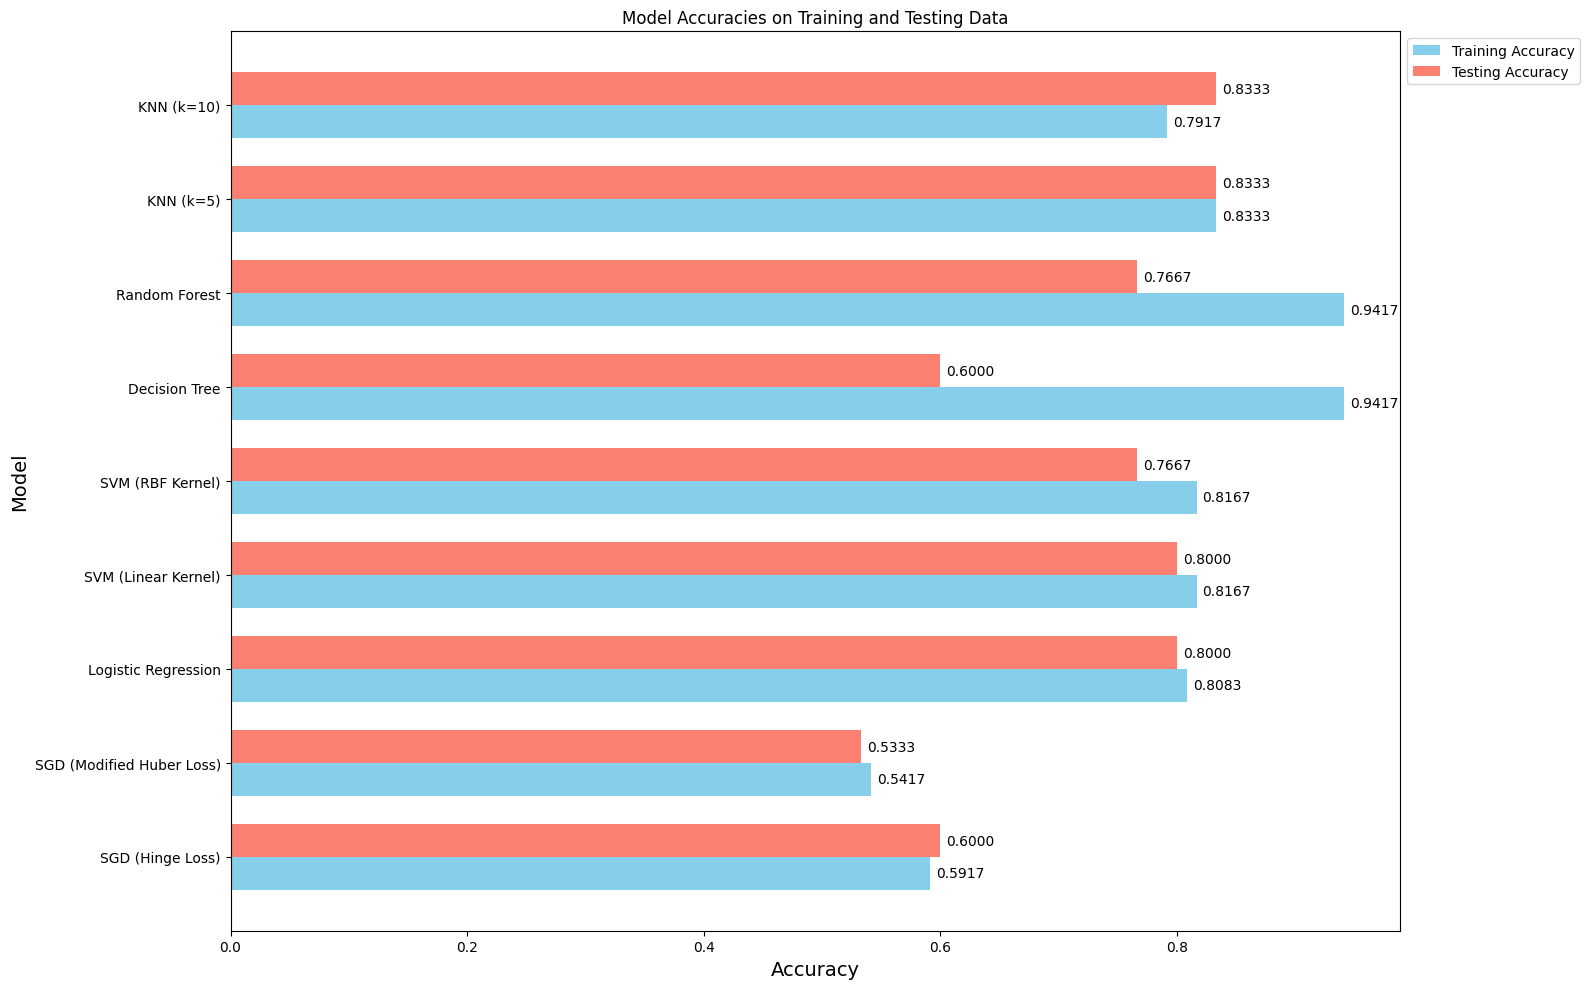

In [12]:
plt.figure(figsize=(16, 10))

bar_width = 0.35
indices = np.arange(len(train_results))

train_bars = plt.barh(indices - bar_width/2, list(train_results.values()), bar_width, label='Training Accuracy', color='skyblue')
test_bars = plt.barh(indices + bar_width/2, list(test_results.values()), bar_width, label='Testing Accuracy', color='salmon')

plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.yticks(indices, list(train_results.keys()))
plt.title('Model Accuracies on Training and Testing Data')
plt.legend()

def add_labels(bars):
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.005, bar.get_y() + bar.get_height()/2, f'{width:.4f}', ha='left', va='center', fontsize=10)

add_labels(train_bars)
add_labels(test_bars)

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

RESULTS

Stochastic Gradient Descent (SGD) with Hinge Loss:
- Training Accuracy: 80.00%
- Testing Accuracy: 76.67%
- Achieved decent accuracy on both training and testing data. Slight overfitting is present as testing accuracy is slightly lower than training accuracy.

Stochastic Gradient Descent (SGD) with Modified Huber Loss:
- Training Accuracy: 59.17%
- Testing Accuracy: 60.00%
- Lower accuracy compared to SGD with Hinge Loss. Model struggled with both the training and testing data, might be an issue with this loss function.

Logistic Regression:
- Training Accuracy: 80.83%
- Testing Accuracy: 80.00%
- Demonstrates good performance with minimal overfitting. Model is suitable for this dataset, providing consistent results on both training and testing data.

Support Vector Machine (SVM) with Linear Kernel:
- Training Accuracy: 81.67%
- Testing Accuracy: 80.00%
- Similar performance to SVM with RBF Kernel with slight overfitting observed as training accuracy is slightly higher than testing accuracy.

Support Vector Machine (SVM) with RBF Kernel:
- Training Accuracy: 81.67%
- Testing Accuracy: 76.67%
- Similar performance to SVM with Linear Kernel but with greater overfitting as training accuracy is higher than testing accuracy.

Decision Tree:
- Training Accuracy: 94.17%
- Testing Accuracy: 60.00%
- High accuracy on training data but poor generalization to testing data, indicating significant overfitting of the model to the training data.

Random Forest:
- Training Accuracy: 94.17%
- Testing Accuracy: 70.00%
- High accuracy on training data but significant overfitting. Shows better generalization and less overfitting compared to Decision Tree but still has much room for improvement.

K-Nearest Neighbors (KNN) with k=5:
- Training Accuracy: 83.33%
- Testing Accuracy: 83.33%
- Consistent performance on both training and testing data, demonstrating good generalization ability with minimal overfitting.
  
K-Nearest Neighbors (KNN) with k=10:
- Training Accuracy: 79.17%
- Testing Accuracy: 83.33%
- Similar performance to KNN with k=5 on the testing data. Slightly lower training accuracy but same testing accuracy indicates good generalization ability.

CONCLUSIONS

The purpose of our assignment was to use the Iris dataset once again to test the accuracy and effectiveness of various learning models on identifying samples from three different flower species (Setora, Versicolor, and Virginica) using only two features: sepal length and sepal width.  From the results, we can observe the variations in accuracies across models visually on graphs.

In summary, the Logistic Regression and KNN models appear to be the most suitable to use for this dataset, as they consistently demonstrate good performance on both training and testing data without significant overfitting. The SVM models also perform well but show slightly higher overfitting when compared to LR and KNN. The SGD models display mixed performances, with the Hinge Loss functioning better than Modified Huber Loss but having greater overfitting, while Modified Huber Loss performed significantly worse but with less overfitting. Overall, the Decision Tree and Random Forest models show high accuracy on training data but struggle with generalization to unseen data, indicating overfitting. 

To conclude, our findings highlight the importance of model type consideration as well as specifications such as loss function and variables when creating classification models. Certain models may excell in one specification but produce subpar results with another. There may also be the need for additional parameters to be set in order to ensure greater accuracy and consistency. 